# APIs & Web Scraping

In this notebook, I collect job data using APIs and then salary data using Web Scraping.

## Table of Contents:

1. [Collecting Job Data Using APIs](#Collecting-Job-Data-Using-APIs)
2. [Web Scraping Average Salary Data](#Web-Scraping-Average-Salary-Data)


## Collecting Job Data Using APIs

Dataset Used in Assignment:

The dataset used in this analysis comes from the following source: https://www.kaggle.com/promptcloud/jobs-on-naukricom under the under a Public Domain license. The original dataset is a csv, which has been converted to json.

json link: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json

 ##### The keys in the json are 
 * Job Title
  * Job Experience Required
  * Key Skills
  * Role Category
  * Location
  * Functional Area
  * Industry
  * Role 


### Objective

Determine the number of jobs currently open for various technologies and for various locations

In [65]:
#Import required libraries
import requests
import pandas as pd
import json
import urllib3

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

api_url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"

### Find Number of Jobs per Technology

In [66]:
# Call the API and get JSON data
response = requests.get(api_url, verify=False)

# if no errors
if response.status_code == 200:
    # Store the result in a variable called data (type = list of dictionaries)
    data = response.json()

    # Load into a pandas DataFrame
    tech_df = pd.DataFrame(data)

    # Clean and split the "Key Skills" column into a list of skills
    # Note: this is necessary so we are able to count the occurrences of individual technologies
    # (otherwise it would be difficult to distinguish C from C#, for example)
    tech_df['Skill List'] = (
        tech_df['Key Skills']
        .str.lower()                      # lowercase
        .str.split('|')                   # split on '|'
        .apply(lambda skills: [s.strip() for s in skills])  # strip spaces
    )


# if error
else:
    print("Failed to fetch data. Status code:", response.status_code)

In [67]:
# visualize the dataframe
tech_df.head()

,Id,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Skill List
0,0,Digital Media Planner,5 - 10 yrs,Media Planning| Digital Media,Advertising,Los Angeles,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,"[media planning, digital media]"
1,1,Online Bidding Executive,2 - 5 yrs,pre sales| closing| software knowledge| client...,Retail Sales,New York,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,"[pre sales, closing, software knowledge, clien..."
2,2,Trainee Research/ Research Executive- Hi- Tech...,0 - 1 yrs,Computer science| Fabrication| Quality check| ...,R&D,San Francisco,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive,"[computer science, fabrication, quality check,..."
3,3,Technical Support,0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Washington DC,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer,[technical support]
4,4,Software Test Engineer -hyderabad,2 - 5 yrs,manual testing| test engineering| test cases| ...,Programming & Design,Boston,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer,"[manual testing, test engineering, test cases,..."


In [68]:
def get_number_of_jobs_T(technology):
    # technology refers to one item in the 'key skills' value, e.g. 'Python'
    
    # Count how many jobs mention the technology
    count = tech_df['Skill List'].apply(lambda skills: technology.lower() in skills)
    number_of_jobs = count.sum()
        
    return technology,number_of_jobs

Calling the function for Python and checking if it works.

In [69]:
get_number_of_jobs_T("Python")

('Python', 1165)

### Find Number of Jobs per Location

In [70]:
 def get_number_of_jobs_L(location):

    number_of_jobs = tech_df[tech_df['Location'].str.strip().str.lower() == location.lower()].shape[0]
        
    return location,number_of_jobs
    

Call the function for Los Angeles and check if it is working.

In [71]:
get_number_of_jobs_L("Los Angeles")

('Los Angeles', 640)

### Collect Number of Job Postings for Variety of Technologies

Collect the number of job postings for the following languages using the API:

- C
- C#
- C++
- Java
- JavaScript
- Python
- Scala
- Oracle
- SQL Server
- MySQL Server
- PostgreSQL
- MongoDB

In [72]:
# create a list of all technologies required
technologies_list = ['C','C#','C++','Java','JavaScript','Python','Scala','Oracle','SQL Server','MySQL','PostgreSQL','MongoDB']

#### Get data for number of job postings for each technology in the list above

In [73]:
# initialize empty list
tech_data = []

# Loop through each technology and find # job postings
for technology in technologies_list:
    [tech,number_of_jobs] = get_number_of_jobs_T(technology)
    
    # save the info to tech_data list
    tech_data.append([tech,number_of_jobs])

# create dataframe
df = pd.DataFrame(tech_data,columns = ['Technology','Number of Job Postings'])

In [74]:
# check dataframe
df

,Technology,Number of Job Postings
0,C,817
1,C#,487
2,C++,496
3,Java,1209
4,JavaScript,2241
5,Python,1165
6,Scala,89
7,Oracle,614
8,SQL Server,310
9,MySQL,920


#### Plot the data to visualize and make inferences

In [75]:
# Import the relevant library
import matplotlib.pyplot as plt

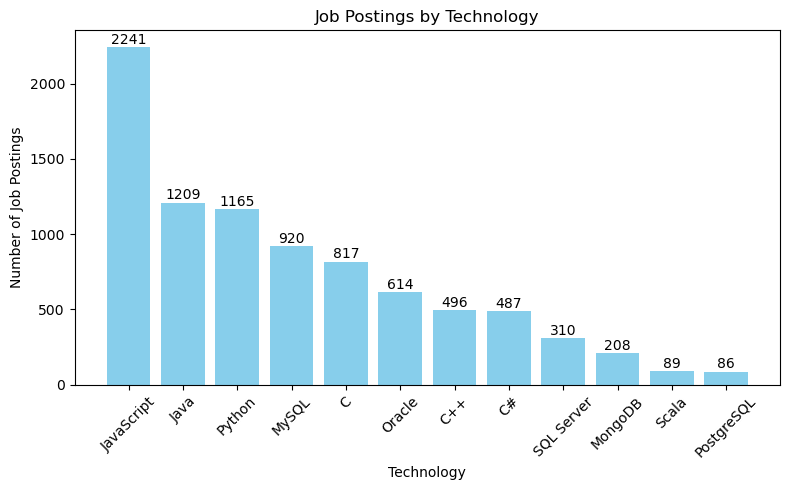

In [76]:
# plot the data
plt.figure(figsize=(8, 5))

# sort dataframe in descending order
df = df.sort_values(by='Number of Job Postings', ascending=False)

# bar plot
bars = plt.bar(df['Technology'],df['Number of Job Postings'], color='skyblue')

# Add number labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2,  # position: middle top
             f'{int(height)}', ha='center', va='bottom')  # height is the y-value

plt.title('Job Postings by Technology')
plt.xlabel('Technology')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)  
plt.tight_layout()       # Adjust layout
plt.show()


#### Store Results in Excel File

In [77]:
# save dataframe to excel sheet
df.to_excel('job postings.xlsx',index=False)

### Identify Top 10 Key Skills in Job Postings

In [78]:
from collections import Counter 

# flatten all skills into one big list
# note - this loops through each row in the tech_df key skill set column and adds each element to all_skills list
all_skills = [skill for skills in tech_df['Skill List'] for skill in skills]

# count the frequency of each skill
skill_counts = Counter(all_skills)

# get the top 10 skills
top_10_skills = skill_counts.most_common(10)
top_10_skills



[('javascript', 2251),
 ('sales', 1821),
 ('sql', 1543),
 ('html', 1532),
 ('customer service', 1292),
 ('java', 1210),
 ('python', 1165),
 ('jquery', 1088),
 ('business development', 1055),
 ('recruitment', 1037)]

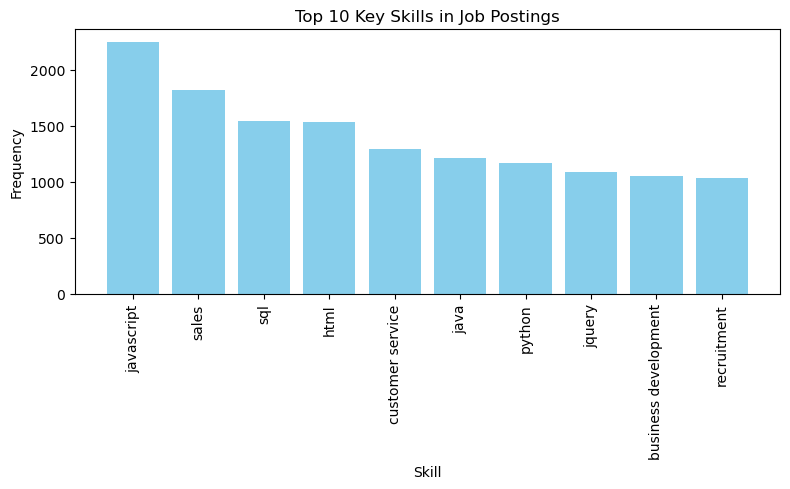

In [79]:
# convert to DataFrame for plotting purposes
top_skills_df = pd.DataFrame(top_10_skills, columns=['Skill', 'Count'])
plt.figure(figsize=(8, 5))
plt.bar(top_skills_df['Skill'], top_skills_df['Count'], color='skyblue')
plt.title('Top 10 Key Skills in Job Postings')
plt.xlabel('Skill')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Inference:
#### Demand for Programming Language Skills:
Based on an analysis of job postings from Naukri.com (via the Kaggle dataset linked above), it’s evident that JavaScript stands out as the most in-demand technology, appearing in over 2,200 job postings. This is followed by Java and Python, highlighting their continued relevance in full-stack, backend, and data-related roles.

Among databases, MySQL leads in demand, followed by Oracle, SQL Server, and MongoDB, indicating a strong market need for proficiency in both relational and NoSQL databases. Older but widely used languages like C, C++, and C# still feature significantly, reflecting the industry's need for systems programming, enterprise solutions, and legacy system support.

The lower number of postings for technologies like Scala, PostgreSQL, and MongoDB doesn’t necessarily imply lack of value — it may reflect their specialized use in particular industries or fewer companies currently hiring for those stacks.

Overall, the job market favors versatile, widely adopted languages and database proficiency, making them strategic skill areas for aspiring and current tech professionals.

#### Top 10 Key Skills:
From the extracted key skills in job postings, technical and soft/business skills appear side by side in demand. JavaScript tops the list (2,251 mentions), reaffirming its dominance as a core web development language. This is closely followed by SQL and HTML, which are foundational for both front-end and back-end roles. The appearance of Python and Java further reflects the industry’s demand for flexible, general-purpose programming knowledge.

Interestingly, sales, customer service, business development, and recruitment are also among the top 10. This suggests that the dataset encompasses a broad range of job categories, not limited to just tech roles. It highlights the growing importance of cross-functional skills, where communication, client handling, and business understanding are as valued as technical expertise.

The presence of jQuery indicates continued reliance on legacy or widely-used JavaScript frameworks in many companies, especially in regions where modernization of tech stacks may be slower.

In summary, while technical proficiency is crucial, this data underscores that well-rounded candidates with a mix of coding, data, and interpersonal skills are in highest demand.

## Web Scraping Average Salary Data

Data needs to be extracted from the below web site:
https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html



### Objective

The information we need is the name of the programming language and average annual salary.

Import the required libraries

In [80]:
from bs4 import BeautifulSoup # this helps in web scrapping.
import requests  # this helps us to download a webpage
import pandas as pd

In [81]:
# url for web scraping
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url, verify = False).text 

In [82]:
# create a soup object
soup = BeautifulSoup(data,"html.parser")  # create a soup object using the variable 'data'

Scrape the `Language name` and `annual average salary`.

In [83]:
#find a html table in the web page
table = soup.find('table') # in html table is represented by the tag <table>

# create empty list to store language name and annual average salary
language_salaries = []

for row in table.find_all('tr')[1:]:  # skip first <tr> which is header # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    language_name = cols[1].getText()
    annual_ave_salary = cols[3].getText()
    print("{}--->{}".format(language_name,annual_ave_salary))
    
    language_salaries.append({
            'language': language_name,
            'annual_average_salary': annual_ave_salary
    })

# convert into a dataframe
salary_df = pd.DataFrame(language_salaries)

# convert from string to integer
salary_df['annual_average_salary'] = salary_df['annual_average_salary'].str.replace(r'[\$,]', '', regex=True).astype(int)
salary_df = salary_df.sort_values(by='annual_average_salary', ascending=False)
salary_df.head()

Python--->$114,383
Java--->$101,013
R--->$92,037
Javascript--->$110,981
Swift--->$130,801
C++--->$113,865
C#--->$88,726
PHP--->$84,727
SQL--->$84,793
Go--->$94,082


,language,annual_average_salary
4,Swift,130801
0,Python,114383
5,C++,113865
3,Javascript,110981
1,Java,101013


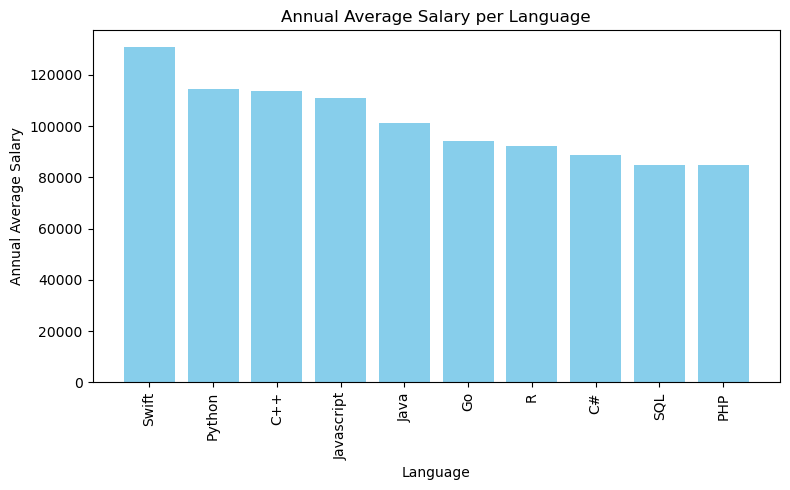

In [84]:
# Plot the languages and their average salary
plt.figure(figsize=(8, 5))
plt.bar(salary_df['language'], salary_df['annual_average_salary'], color='skyblue')
plt.title('Annual Average Salary per Language')
plt.xlabel('Language')
plt.ylabel('Annual Average Salary')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Inference

Based on web-scraped salary data, Swift developers command the highest average salary at \\$130,801, likely due to the specialized and high-demand nature of iOS development. This is followed by Python (\\$114,383), C++ (\\$113,865), and JavaScript (\\$110,981) — all versatile languages used across data science, backend, and full-stack roles.

Languages such as Java (\\$101,013) and Go (\\$94,082) also offer strong earning potential, reflecting their popularity in enterprise and scalable application development. Meanwhile, R, C#, PHP, and SQL fall on the lower end of the salary spectrum (ranging from ~\\$84k to \\$92k), potentially due to broader availability of developers or use in roles that don’t always require deep software engineering skills.

Overall, languages tied to mobile development, data science, and high-performance computing tend to offer higher compensation, while more ubiquitous or specialized scripting/database languages may offer comparatively lower averages.

Save the scrapped data into an CSV file 

In [85]:
import csv

with open('language_salaries.csv', 'w', newline='') as csvfile:
    
    writer = csv.DictWriter(csvfile, fieldnames=['language', 'annual_average_salary'])

    writer.writeheader()
    writer.writerows(language_salaries)